In [35]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error

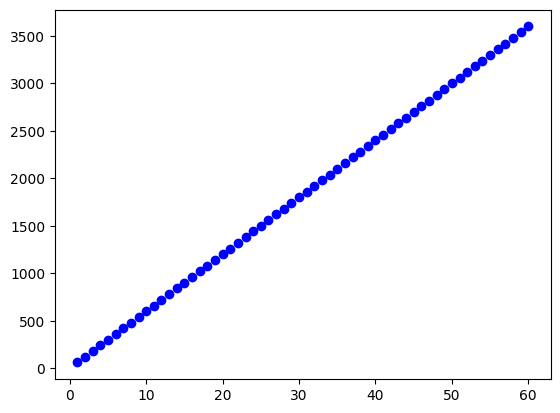

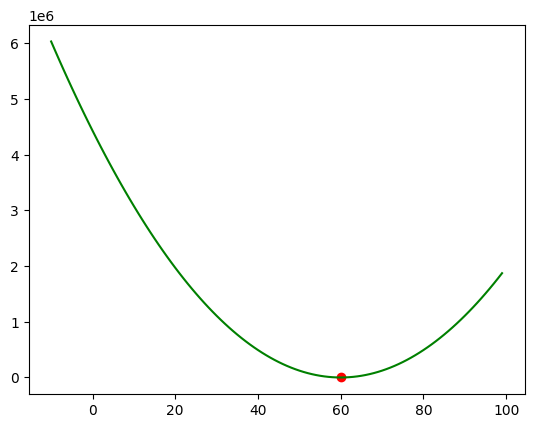

In [40]:
X=np.arange(1,61)
y_true=X*60

plt.scatter(X,y_true,color='blue')
plt.show()

coef_range= np.arange(-10,100)
mse_value=[]

for theta in coef_range:
    y_pred=X*theta
    mse_value.append(np.mean((y_true-y_pred)**2))


plt.plot(coef_range,mse_value,color='green')
min_value_index=np.array(mse_value).argmin()
plt.scatter(coef_range[min_value_index],mse_value[min_value_index],color='red')
plt.show()



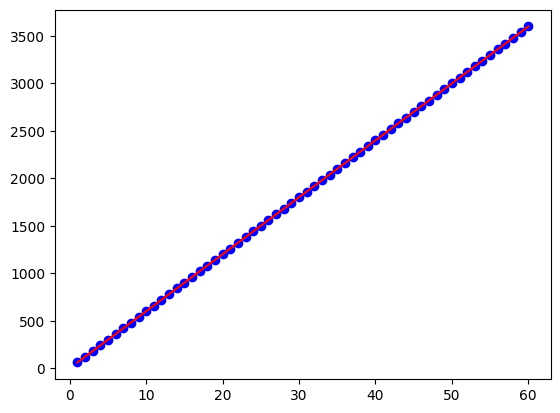

MSE:0.0


In [42]:
y_pred=coef_range[min_value_index]*X
y_pred=60*X
#y_pred=5*X
plt.scatter(X,y_true,color='blue')
plt.plot(X,y_pred,color='red')
plt.show()
mse=mean_squared_error(y_pred,y_true)
print(f'MSE:{mse}')

1.0255249497362287


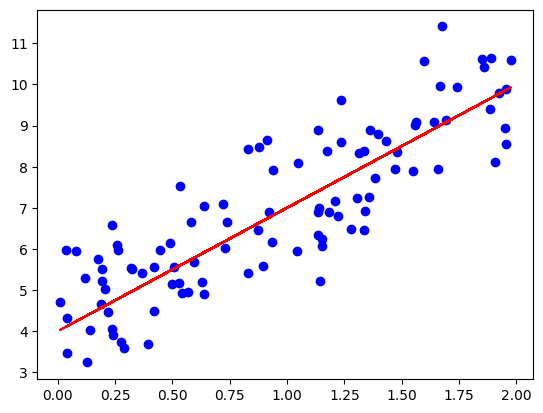

In [43]:
X=2*np.random.rand(100,1)
y_true=4+3*X +np.random.randn(100,1)
plt.scatter(X,y_true,color='blue')
theta_0=4
theta_1=3
y_pred=theta_0+theta_1*X
plt.plot(X,y_pred,color='red')
print(mean_squared_error(y_true,y_pred))

t0=1, t1=1
27.977182240221996


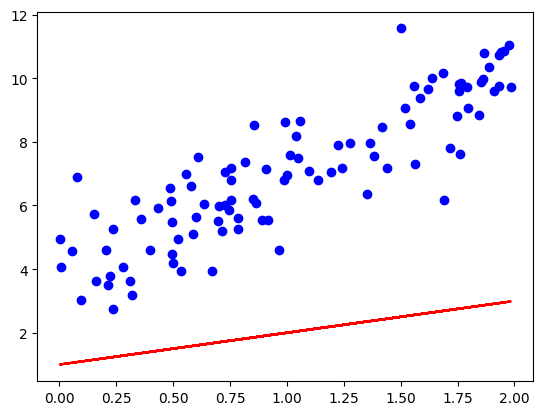

In [46]:
X=2*np.random.rand(100,1)
y_true=4+3*X +np.random.randn(100,1)
plt.scatter(X,y_true,color='blue')
theta_0=np.random.randint(0,10)
theta_1=np.random.randint(0,10)
print(f"t0={theta_0}, t1={theta_1}")
y_pred=theta_0+theta_1*X
plt.plot(X,y_pred,color='red')
print(mean_squared_error(y_true,y_pred))

[4.         3.         0.80538296]


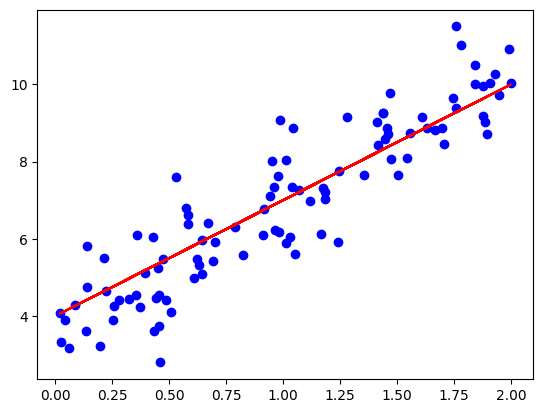

In [47]:
n=100
result=[]
X=2*np.random.rand(n,1)

y_true=4+3*X +np.random.randn(n,1)
plt.scatter(X,y_true,color='blue')
for i in range(1000):
    theta_0=np.random.randint(-10,10)
    theta_1=np.random.randint(-10,10)
    y_pred=theta_0+theta_1*X    
    mse=mean_squared_error(y_true,y_pred)
    result.append([theta_0,theta_1,mse])
result=np.array(result)   
min_indices = np.argmin(result[:,2], axis=0)
y_pred=result[min_indices][0]+result[min_indices][1]*X
plt.plot(X,y_pred,color='red')
print(result[min_indices])

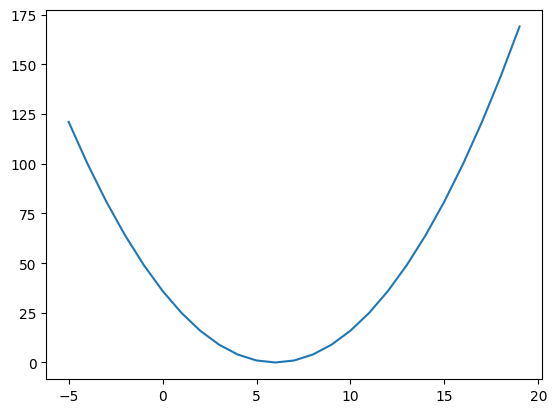

In [59]:
def f(x):
    return (x-6)**2

x = np.arange(-5, 20)
y=f(x)

plt.plot(x,y)


In [49]:
def LS(x,y):
    x2=x**2
    xy=x*y
    theta1=(n*np.sum(xy) - (np.sum(x) * np.sum(y)))  / ( (n*np.sum(x2)) - np.sum(x)**2) 
    theta0=(np.sum(y)- theta1*np.sum(x))/n
    return theta0,theta1

4.30100576826489 2.6616839815153788
0.7831399779772369


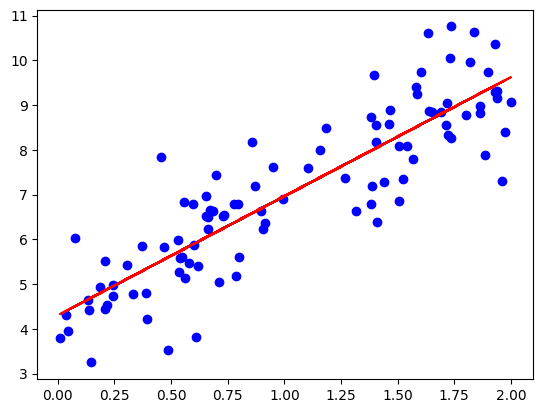

In [51]:
n=100
X=2*np.random.rand(n,1)
y_true=4+3*X +np.random.randn(n,1)
plt.scatter(X,y_true,color='blue')
# LS
theta_0,theta_1=LS(X,y_true)
print(theta_0,theta_1)
y_pred=theta_0+theta_1*X 
mse=mean_squared_error(y_true,y_pred)
plt.plot(X,y_pred,color='red')
print(mse)

In [5]:
# Сгенерируем большой датасет
np.random.seed(42)
n_samples = 1_000_000   # количество объектов
n_features = 50         # количество признаков

X = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
y = np.random.randn(n_samples)

In [6]:
# ---------- Векторизованный способ ----------
start = time.time()
mse_vec = np.square(X.dot(w)-y).mean()
end = time.time()
print(f"Vectorized MSE: {mse_vec:.6f}, time: {end - start:.4f} sec")

Vectorized MSE: 52.966890, time: 0.0289 sec


In [8]:
start = time.time()
errors = []
for i in range(n_samples):
    # скалярное произведение руками
    y_pred = 0
    for j in range(n_features):
        y_pred += w[j] * X[i][j]
    err = (y_pred - y[i]) ** 2
    errors.append(err)
mse_loop = sum(errors) / n_samples
end = time.time()
print(f"For-loop MSE: {mse_loop:.6f}, time: {end - start:.4f} sec")

For-loop MSE: 52.966890, time: 20.4428 sec


[-0.03012529  1.99056493]


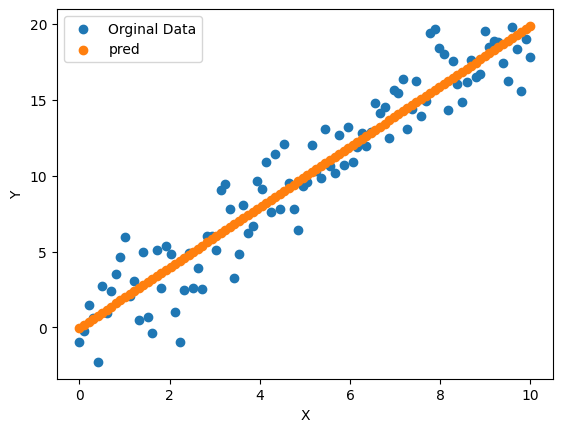

In [52]:
n = 100
X1 = np.linspace(0, 10, n)
noise = np.random.normal(0, 2, n)  
Y = (2 * X1 )+noise
X=np.c_[np.ones(len(X1)),X1]
#print(X)
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print(coefficients)
y_pred = X @ coefficients

plt.scatter(X1, Y, label='Orginal Data')
plt.scatter(X1, y_pred, label='pred')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, Y)
print("theta0 (intercept) =", model.intercept_)
print("theta1 (slope)     =", model.coef_)

theta0 (intercept) = 0.0
theta1 (slope)     = [-0.03012529  1.99056493]


In [27]:
np.random.seed(0)
n = 6
x1 = np.random.randn(n)
x2 = np.random.randn(n)
x3 = 2.0 * x2         # линейная зависимость
X = np.c_[x1, x2, x3]

X = np.c_[np.ones(n), X]  

XtX = X.T @ X
print("rank(X) =", np.linalg.matrix_rank(X))
print("shape X =", X.shape)
print("det(X^T X) ≈", np.linalg.det(XtX))
np.linalg.inv(XtX)

rank(X) = 3
shape X = (6, 4)
det(X^T X) ≈ 0.0


LinAlgError: Singular matrix

In [31]:
X = np.array([
    [1.0, 5.0],
    [2.0, 5.0],
    [3.0, 5.0],
    [4.0, 5.0],
    [5.0, 5.0]
])

y = np.array([1, 2, 3, 4, 5])

X = np.c_[np.ones(len(X)), X]

XtX = X.T @ X
print("rank(X) =", np.linalg.matrix_rank(X))
print("det(X^T X) =", np.linalg.det(XtX))
np.linalg.inv(XtX)

rank(X) = 2
det(X^T X) = 0.0


LinAlgError: Singular matrix

In [33]:
np.var(X,axis=0)

array([0., 2., 0.])

In [34]:
np.linalg.pinv(X)

array([[ 3.07692308e-02,  1.92307692e-02,  7.69230769e-03,
        -3.84615385e-03, -1.53846154e-02],
       [-2.00000000e-01, -1.00000000e-01, -2.99179154e-17,
         1.00000000e-01,  2.00000000e-01],
       [ 1.53846154e-01,  9.61538462e-02,  3.84615385e-02,
        -1.92307692e-02, -7.69230769e-02]])